# xG Flow Charts

A flow chart shows the flow of xG throughout a match.

It's basically a timeline of xG, with the xG of each shot shown at the time it was taken and it is show how the xG accumulates over time.

In [44]:
# Let's get our data
import pandas as pd

# Load the data
# We'll look at the data from the final of the 2021/22 UEFA Champions League between Real Madrid and Liverpool

df = pd.read_html(
    'https://fbref.com/en/matches/e81453d3/Liverpool-Real-Madrid-May-28-2022-Champions-League', 
    attrs={'id': 'shots_all'}
)[0]

In [45]:
df.head()

Unnamed: 0_level_0      Unnamed: 1_level_0 Unnamed: 2_level_0  \
              Minute                  Player              Squad   
0                 16           Mohamed Salah          Liverpool   
1                 16               Luis Díaz          Liverpool   
2                 16        Thiago Alcántara          Liverpool   
3                 17           Mohamed Salah          Liverpool   
4                 19  Trent Alexander-Arnold          Liverpool   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                  xG               PSxG            Outcome           Distance   
0               0.29               0.53              Saved                9.0   
1               0.07                NaN            Blocked               15.0   
2               0.04               0.13              Saved               23.0   
3               0.09               0.10              Saved               18.0   
4               0.05                NaN         Off Target               18.0   

  Unnamed: 7_level_0 Unnamed: 8_level_0             SCA 1               \
           Body Part              Notes            Player        Event   
0         Right Foot                NaN  Jordan Henderson  Pass (Live)   
1          Left Foot                NaN        Sadio Mané  Pass (Live)   
2         Right Foot                NaN  Andrew Robertson  Pass (Live)   
3          Left Foot                NaN        Sadio Mané  Pass (Live)   
4         Right Foot                NaN     Mohamed Salah  Pass (Live)   

              SCA 2               
             Player        Event  
0  Thiago Alcántara  Pass (Live)  
1     Mohamed Salah  Pass (Live)  
2         Luis Díaz         Shot  
3  Andrew Robertson  Pass (Live)  
4        Sadio Mané  Pass (Live)

In [46]:
# Let's clean the columns up
# First we will drop the SCA columns because they will mess up our column names
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [47]:
# And filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Liverpool,Mohamed Salah,16,0.29,Saved
1,Liverpool,Luis Díaz,16,0.07,Blocked
2,Liverpool,Thiago Alcántara,16,0.04,Saved
3,Liverpool,Mohamed Salah,17,0.09,Saved
4,Liverpool,Trent Alexander-Arnold,19,0.05,Off Target


In [48]:
# Now let's create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG
0,Liverpool,Mohamed Salah,16,0.29,Saved,0.29
1,Liverpool,Luis Díaz,16,0.07,Blocked,0.36
2,Liverpool,Thiago Alcántara,16,0.04,Saved,0.40
3,Liverpool,Mohamed Salah,17,0.09,Saved,0.49
4,Liverpool,Trent Alexander-Arnold,19,0.05,Off Target,0.54
5,Liverpool,Sadio Mané,21,0.06,Saved,0.60
6,Liverpool,Fabinho,28,0.03,Off Target,0.63
7,Liverpool,Mohamed Salah,34,0.04,Saved,0.67
8,Liverpool,Sadio Mané,40,0.13,Blocked,0.80
9,Liverpool,Jordan Henderson,41,0.01,Off Target,0.81


In [49]:
# We also need to get the minute in a format that we can use to plot the flow chart
# Let's first drop the nan values that FBREF uses as a divider
# So let's drop that nan row and then cast to an int
df = df.dropna(subset=['Minute'])
df['Minute']

0       16
1       16
2       16
3       17
4       19
5       21
6       28
7       34
8       40
9       41
10      43
12      54
13      54
14      58
15      58
16      59
17      59
18      64
19      69
20      69
21      74
22      74
23      79
24      80
25      80
26      81
27      82
28    90+2
Name: Minute, dtype: object

In [50]:
# You might also see that some minutes have a '+' in them, which means that the minute is the minute of the first half plus the minute of the second half
# Let's also create a column that shows which half the minute is 
# (since we can have a 46th minute in the first half and a 46th minute in the second half)
df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)
df

/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_9328/1136402999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


,Squad,Player,Minute,xG,Outcome,cumulative_xG,half
0,Liverpool,Mohamed Salah,16,0.29,Saved,0.29,1
1,Liverpool,Luis Díaz,16,0.07,Blocked,0.36,1
2,Liverpool,Thiago Alcántara,16,0.04,Saved,0.40,1
3,Liverpool,Mohamed Salah,17,0.09,Saved,0.49,1
4,Liverpool,Trent Alexander-Arnold,19,0.05,Off Target,0.54,1
5,Liverpool,Sadio Mané,21,0.06,Saved,0.60,1
6,Liverpool,Fabinho,28,0.03,Off Target,0.63,1
7,Liverpool,Mohamed Salah,34,0.04,Saved,0.67,1
8,Liverpool,Sadio Mané,40,0.13,Blocked,0.80,1
9,Liverpool,Jordan Henderson,41,0.01,Off Target,0.81,1


In [51]:
# Now let's adjust the minute to add the minutes if there is a '+' in the minute
df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))
df['Minute']

/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_9328/2636291158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


0     16
1     16
2     16
3     17
4     19
5     21
6     28
7     34
8     40
9     41
10    43
12    54
13    54
14    58
15    58
16    59
17    59
18    64
19    69
20    69
21    74
22    74
23    79
24    80
25    80
26    81
27    82
28    92
Name: Minute, dtype: int64

Text(0.1, 0.0, '@mckayjohns/twitter')

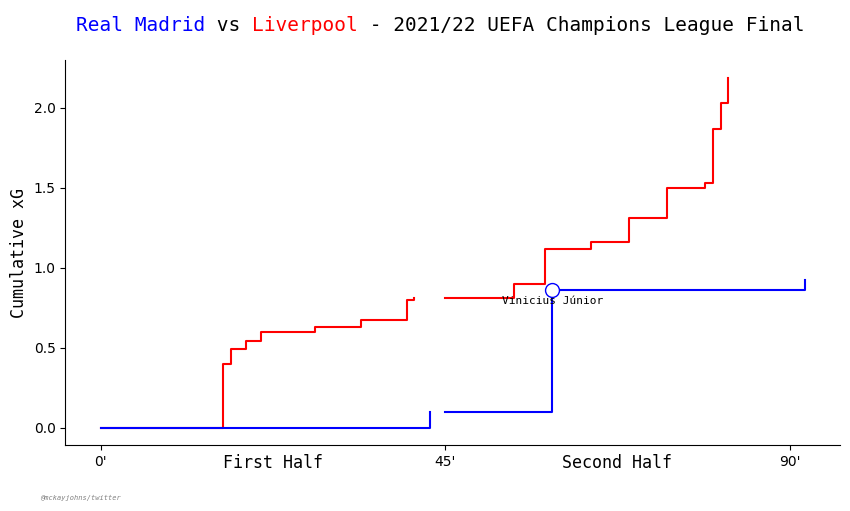

In [100]:
# We now have the data we need to create the flow chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the xG for each team by half
# We want to make it so the lines both start at 0

liverpool_color = 'red'
real_madrid_color = 'blue'

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
    
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]), team_df[team_df['half'] == 2]])

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=liverpool_color if team == 'Liverpool' else real_madrid_color
        )   
        

# We Can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=liverpool_color if team == 'Liverpool' else real_madrid_color,
            s=100,
            # We want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] - .07, 
            x['Player'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )
        
# Let's label the x axis with first and second half
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

# Lets add the actual words "First Half" and "Second Half" to the plot under the x axis
ax.text(22.5, -.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)

# Let's label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

# Let's get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Let's change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<Real Madrid> vs <Liverpool> - 2021/22 UEFA Champions League Final', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': real_madrid_color}, {'color': liverpool_color}]
)


# Now let's add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    '@mckayjohns/twitter', 
    fontsize=5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)

In [102]:
# now let's save the plot
fig.savefig('/Users/mckayjohns/Desktop/xG_flow_chart.png', dpi=300, bbox_inches='tight')